<h3>ML4 Assessed Exercies - Anton Belev 1103816b</h3>
<p>I decided to implement my solution using Python. You can see the code and the comments
on each section below.</p>
<p>You have to execute each section sequentially starting from the top. Most of the algorithms take just a few seconds to produce the output. Only the KNN algorithm takes like 5 min to complete.</p>

<h3>1. (a) Loading Red Wine data set...</h3>


In [89]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
import numpy as np
with open('winequality-red.csv') as f:
    lines = (line for line in f)
    data = np.loadtxt(lines, delimiter=';', skiprows=1)
q = data[:,11]

<h3>1. (b) Loading White Wine data set...</h3>

In [90]:
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', 'winequality-white.csv')
with open('winequality-white.csv') as fw:
    lines_white = (line for line in fw)
    data_white = np.loadtxt(lines_white, delimiter=';', skiprows=1)
q_white = data_white[:,11]

<h3>2. (a) Plotting Red Wine Quality distribution...</h3>

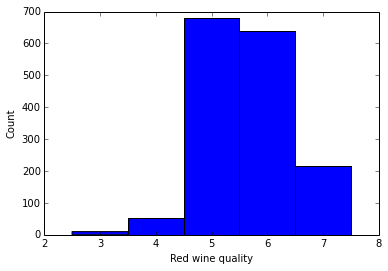

In [91]:
%matplotlib inline
import pylab as plt
plt.hist(q, bins=np.arange(q.min(), q.max()+1), align='left')
plt.xlabel('Red wine quality')
plt.ylabel('Count')

<h3>2. (b) Plotting White Wine Quality distribution...</h3>

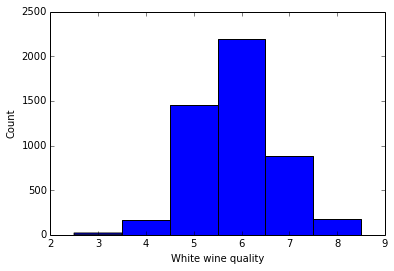

In [92]:
%matplotlib inline
import pylab as plt
plt.hist(q_white, bins=np.arange(q_white.min(), q_white.max()+1), align='left')
plt.xlabel('White wine quality')
plt.ylabel('Count')

<h3>3. Comments on these distributions</h3>
<p>Data seems to follow a Gaussian Distribution, however we can see that there are dominating classes in both data sets. This means that the model will easily predict qualities that are dominating in the training data, but hardly predict outliers. For examples for the Red Wine data, qualities 5 and 6 sums over 1300 out of 1600, this means that our model’s predictions will be dominated by these values. Also we can say that
the error distribution should be a Gaussian.</p>

<h3>4. Linear regression</h3>

In [93]:
from numpy.linalg import inv

def fitRegressionModelAndGetSquareError(showPlot, order):
    N = data.shape[0] #get tupple (numRows, numCols)
    np.random.shuffle(data) # randomly shuffle the data

    # split the data in 70% train and 30% test
    train = data[:int(N*0.7)]
    test = data[int(N*0.7):]
    
    X_train = train[:,:11]
    X_train = X_train **(order)
    X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
    q_train = train[:,11]
    # data is now splitted into train and test
    
    XtX = np.dot(X_train.T, X_train) 
    XtXI = inv(XtX)
    XtXIXt = np.dot(XtXI, X_train.T)
    # Fitting the regression model to the training data.
    # Depending on the order parameter, we can fit linear (order = 1), square or higher order
    # regression models.
    wbar = np.dot(XtXIXt, q_train)
    # Optimal values for the wbar are now found. 
    # For these values we are minimizing the Loss agianst the train data

    X_test = test[:,:11]
    X_test = X_test **(order)
    X_test = np.c_[np.ones(test.shape[0]), X_test]
    q_test = test[:,11]
    f_test = np.dot(X_test, wbar) # getting the prediction values
    
    meanSquareError = ((q_test-f_test)**2).mean()
    
    # Part 4(c) Scatter plot showing predictions vs true values
    if showPlot:
        print "Linear regression with minimised square loss. Mean Square Error =", meanSquareError
        plt.scatter(f_test,q_test, color='blue')      
        plt.xlabel('Red wine predicted quality')
        plt.ylabel('Red wine test data quality')
    return meanSquareError

<h3>4 (a), (b) and (c) The function above splits the data in 70% train and 30% test. Fits the linear
regression to the training data and prints the Mean Square Error</h3>

Linear regression with minimised square loss. Mean Square Error = 0.416247713987


0.41624771398723215

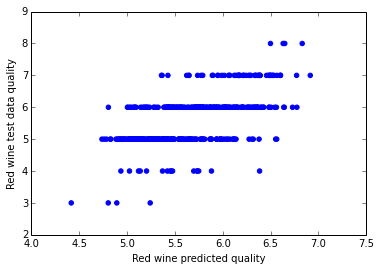

In [94]:
fitRegressionModelAndGetSquareError(True,1)

<h3>4 (d) Benchmark Suggestion</h3>
<p>In the previous section we have used a linear regression model to predict new quality values. I decided to benchmark the linear regression from my linear model with higher order regression functions.</p>

<h3>4 (e) Benchmark Code</h3>

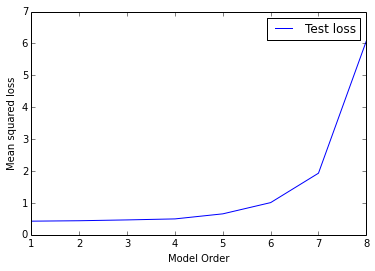

In [95]:
max_order = 7
runs = 100
error_runs = np.zeros((max_order+1,100))
errors = []
orders = [i+1 for i in range(max_order+1)]

for k in range(max_order+1):
    for i in range(100):
        err = fitRegressionModelAndGetSquareError(False, k+1)
        error_runs[k,i] = err

plt.figure()
plt.plot(np.array(orders),error_runs.mean(axis=1),'b-',label="Test loss")
plt.legend()
plt.xlabel('Model Order')
plt.ylabel('Mean squared loss')    

<h3>4 (f) Linear Regression Perforamnce compared to the benchmark</h3>
<p>Above I have plotted the mean error for each order regression after 100 runs. You can see from the figure that we have minimum mean square error after 100 runs for the linear regression model. As we increase the order of the regression function this error gradually increases. Increasing the error makes the function more complex, which is known as overfitting. The higher the order of the regression, the model tends to memorize more the training data and thus will perform poorly on the unseen test data.</p>

<h3>5 (a) Implementing Regularised least square and plotting lampda parameter agains the error.</h3>

lampda 0 Mean Square Error = 0.463483844508
lampda 0.01 Mean Square Error = 0.493749766475
lampda 0.02 Mean Square Error = 0.503420500417
lampda 0.04 Mean Square Error = 0.516335782417
lampda 0.08 Mean Square Error = 0.530644187406
lampda 0.16 Mean Square Error = 0.543647876997
lampda 0.32 Mean Square Error = 0.554747235201
lampda 0.64 Mean Square Error = 0.566303280546
lampda 1.28 Mean Square Error = 0.582999680411


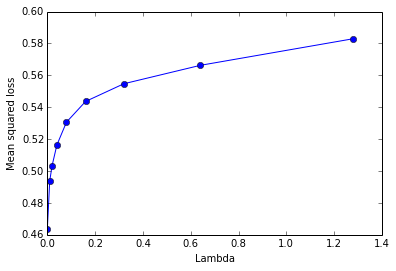

In [96]:
import pylab as plt
from numpy.linalg import inv

#np.random.shuffle(data)
N = data.shape[0] #get tupple (numRows, numCols)

train = data[:int(N*0.7)]
test = data[int(N*0.7):]
X_train = train[:,:11]
X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
q_train = train[:,11]

X_test = test[:,:11]
X_test = np.c_[np.ones(test.shape[0]), X_test]
q_test = test[:,11]

lambs = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64, 1.28]
errors = []
for lamb in lambs:
    XtX = np.dot(X_train.T, X_train)
    XtXlam = XtX + X_train.shape[0]*lamb*np.identity(12)
    XtXlamI = inv(XtXlam)
    XtXIXt = np.dot(XtXlamI, X_train.T)
    w = np.dot(XtXIXt, q_train)
    
    f_test = np.dot(X_test,w)
    meanSquareError = ((q_test-f_test)**2).mean()
    errors += [meanSquareError]
    print "lampda", lamb, "Mean Square Error =", meanSquareError

plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Mean squared loss')
plt.plot(lambs, errors, '-o')

<h3>5 (b) Why this is not a good way to determine the value of lampda</h3>
<p>TODO</p>

<h3>5 (c) Implementation of 10-fold Cross Validation</h3>

Min cv_loss error is at lampda = 0. The error is = 0.41075650445
Min train_loss error is at lampda = 0. The error is = 0.400051954958
Min ind_loss error is at lampda = 0. The error is = 0.464004342426


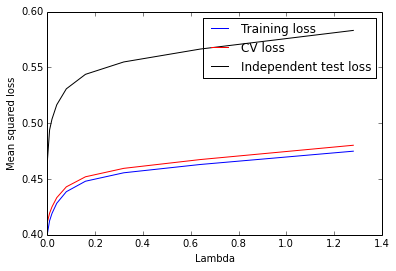

In [97]:
N = train.shape[0]
K = 10
sizes = np.tile(np.floor(N/10),(1,K))
sizes[-1] = sizes[-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes)))
X = np.copy(train[:,:11])
X = np.c_[np.ones(train.shape[0]), X]
t = np.copy(train[:,11])
X_test = np.copy(test[:,:11])
X_test = np.c_[np.ones(test.shape[0]), X_test]
t_test = np.copy(test[:,11])
lambs = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64, 1.28]
cv_loss = np.zeros((K, len(lambs)))
ind_loss = np.zeros((K, len(lambs)))
train_loss = np.zeros((K, len(lambs)))

k = 0
for lamb in lambs:
    for fold in range(K):
        X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
        X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)

        t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
        t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        XtX = np.dot(X_train.T, X_train)
        XtXlam = XtX + X_train.shape[0]*lamb*np.identity(12)
        XtXlamI = inv(XtXlam)
        XtXIXt = np.dot(XtXlamI, X_train.T)
        w = np.dot(XtXIXt, t_train)

        fold_pred = np.dot(X_fold,w)
        cv_loss[fold,k] = ((fold_pred - t_fold)**2).mean()
        ind_pred = np.dot(X_test,w)
        ind_loss[fold,k] = ((ind_pred - t_test)**2).mean()
        train_pred = np.dot(X_train,w)
        train_loss[fold,k] = ((train_pred - t_train)**2).mean()

    k += 1

plt.figure()
plt.plot(lambs,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(lambs,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(lambs,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Mean squared loss')

print "Min cv_loss error is at lampda = 0. The error is =", cv_loss.mean(axis=0)[0]
print "Min train_loss error is at lampda = 0. The error is =", train_loss.mean(axis=0)[0]
print "Min ind_loss error is at lampda = 0. The error is =", ind_loss.mean(axis=0)[0]

<h3>5 (d) Compare the performance with the standard linear regression case.</h3>

<p>TODO</p>

<h3>6 Classification.</h3>
<h4>6 (a) Limitation of using regression</h4> 
<p>Regression functions predict a continuous variable. In our case the wine qualities are not meant to be a continuous variable. Since the target values are discrete we should use a classifier instead of regression function. The classifier will assign each test to a particular class, which in our case will make more sense.</p>
<h4>6 (b) Positive and negative features of KNN classifier with respect to our data</h4> 
<p>I decided to use the K-Nearest Neighbours(KNN) classifier. This is a non-probabilistic classifier which will always assign a certain class to the current test data. I believe it will be suitable for our case, since prediction wrong qualities with KNN won’t result in fatal cases, where would be the case if we were to predict diseases. On the other hand as we saw before, the distribution of the target variables is such that there are two dominating classes. This implies that as we increase the K parameter, KNN will tend to predict only those two dominating classes, thus small classes will disappear for larger K. So some optimisations will be needed to find the correct value of K.</p>
<h4>6 (c) Data pre-processing</h4> 
<p>TODO</p>

<h3>6 (d) Implementing KNN classifier</h3>

 Started Cross Validation for 10 folds. This may take a few minutes...
Processing... K, 1
Processing... K, 3
Processing... K, 7
Processing... K, 11
Processing... K, 19
Optimal K value found 1
Confusion Matrix
  3   4   5   6   7   8
3 0.0 1.0 1.0 0.0 0.0 0.0 
4 0.0 0.0 3.0 4.0 0.0 0.0 
5 0.0 11.0 143.0 56.0 6.0 0.0 
6 0.0 4.0 63.0 98.0 19.0 2.0 
7 0.0 0.0 10.0 25.0 27.0 1.0 
8 0.0 0.0 0.0 3.0 2.0 1.0 


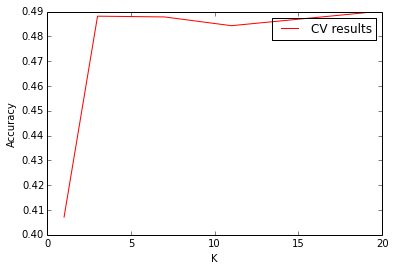

In [102]:
import scipy.spatial.distance as ssd

def knn(k, X_train, X_test, q_train):
    """ k-nearest neighbors """
    # initialize list to store predicted class
    pred_class = []
    # for each instance in data testing,
    # calculate distance in respect to data training
    for ii, di in enumerate(X_test):
        distances = []  # initialize list to store distance
        for ij, dj in enumerate(X_train):
            # calculate distances
            distances.append((calc_dist(di,dj), ij))
        # k-neighbors
        k_nn = sorted(distances)[:k]
        # predict the class for the instance
        pred_class.append(classify(k_nn, q_train))
    # return prediction class
    return pred_class
 
def calc_dist(di,dj):
    return ssd.euclidean(di,dj) # built-in Euclidean fn
 
def evaluate(result):
    # create eval result array to store evaluation result
    eval_result = np.zeros(2,int)
    for x in result:
        # increment the correct prediction by 1
        if x == 0:
            eval_result[0] += 1
        # increment the wrong prediction by 1
        else:
            eval_result[1] += 1
    # return evaluation result
    return eval_result

def classify(k_nn, q_train):
    qlabel = []
    for dist, idx in k_nn:
        # retrieve label class and store into qlabel
        qlabel.append(q_train[idx])
    # return prediction class
    return np.argmax(np.bincount(qlabel))
 
def main():
    N = data.shape[0] #get tupple (numRows, numCols)
    np.random.shuffle(data)
  
    Nfolds = 10
    sizes = np.tile(np.floor(N/10),(1,Nfolds))
    sizes[-1] = sizes[-1] + N - sizes.sum()
    c_sizes = np.hstack((0,np.cumsum(sizes)))
    X = np.copy(data[:,:11])# change to data here if you dont want to run the cv on independent test data
    t = np.copy(data[:,11])
    
    # initialize K
    K = [1,3,7,11,19]
    cv_loss = np.zeros((Nfolds, len(K)))
    print "Started Cross Validation for 10 folds. This may take a few minutes..."
    for i in range(len(K)):
        for fold in range(Nfolds):
            X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
            X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)

            t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
            t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)

            # predict the data test into class
            pred_class = knn(K[i], X_train, X_fold, t_train)
            # evaluate the predicted result
            eval_result = evaluate(pred_class-t_fold)
            # Calculate accuracy
            cv_loss[fold,i] = float(eval_result[1])/float(eval_result[0]+eval_result[1])
        print "Processing... K,",K[i]
    
    plt.plot(K,cv_loss.mean(axis=0),'r-',label="CV results")
    plt.legend()
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    print "Optimal K value found", K[np.argmin(cv_loss.mean(axis=0))]
    return K[np.argmin(cv_loss.mean(axis=0))]
    
def confusionMatrix(optimalK):
    N = data.shape[0] #get tupple (numRows, numCols)
    np.random.shuffle(data)
    
    train = data[:int(N*0.7)]
    test = data[int(N*0.7):]
    X_train = train[:,:11]
    q_train = train[:,11]
    
    X_test = test[:,:11]
    q_test = test[:,11]
    
    confusion_matrix = np.zeros((6,6)) # map class 3 to 0, 4 to 1, 5 to 2, 6 to 3, 7 to 4, 8 to 5
    m = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}

    # predict the data test into class
    pred_class = knn(optimalK, X_train, X_test, q_train)
    # build the confusion matrix
    for p in range(len(pred_class)):
        confusion_matrix[m[pred_class[p]]][m[q_test[p]]] += 1.0
    
    print "Confusion Matrix"
    
    print " ",3," ",4," ",5," ",6," ",7," ",8
    for i in range(6):
        line = str(i+3) + " "
        for j in range(6):
            line += str(confusion_matrix[i][j]) + " "
        print line    
   
optimalK = main()
confusionMatrix(optimalK) 


<h3>6 (e) Display the confusion matrix</h3>

<h3>6 (f) Discuss the performance of KNN</h3>